# ABS Monthly Lending 5601

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    find_id,
    get_meta_constants
)
from plotting import (
    finalise_plot,
    set_chart_dir,
    clear_chart_dir,
    recalibrate_series,
)

# pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

## Get data from ABS

In [2]:
catalogue_id = "5601"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

# This is a bit more complicated than what I usually do ...
abs_dict = {}
for url_num in [0, 1, 2, 3, 4, 5]:
    # get zip file and tables from ABS
    d = get_ABS_meta_and_data(catalogue_id, table=url_num, verbose=False)
    if d is None:
        sys.exit(-1)
    
    # handle meta data
    m = d[META_DATA]
    if META_DATA not in abs_dict:
        abs_dict[META_DATA] = m
    else:
        abs_dict[META_DATA] = pd.concat([abs_dict[META_DATA], m])
    del d[META_DATA]
    
    # handle xlsx files
    abs_dict = {**abs_dict, **d}

meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)
did_col, id_col, table_col, type_col, unit_col = get_meta_constants()

Length of URL list:  6
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Length of URL list:  6
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Length of URL list:  6
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Length of URL list:  6
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Length of URL list:  6
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Length of URL list:  6
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plotting

### Set-up

In [3]:
plt.style.use("fivethirtyeight")
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)

### Housing

In [4]:
def fix_title(title, lfooter):
    test = [
        'Total housing excluding refinancing',
        'Total purpose excluding refinancing',
            'New loan commitments',
            'Value',]
    for c in test:
        text = f'{c} ;'
        if text in title:
            title = title.replace(text, '')
            lfooter = lfooter + f'{c}. '
    title = title.replace(';', '').replace('   ', ' ').replace('  ', ' ')
    return title, lfooter

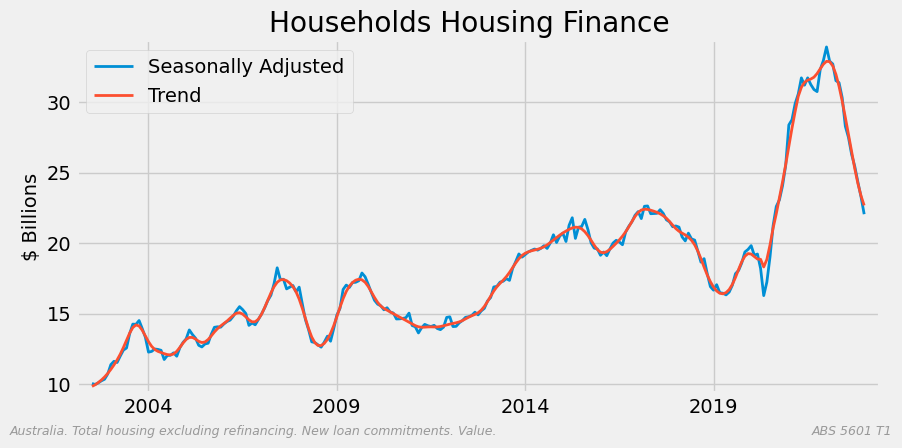

In [5]:
rows = [
    'Households ;  Housing Finance ;  Total housing excluding refinancing ;  New loan commitments ;',
]

for headline in rows:
    f = pd.DataFrame()
    for series_type in 'Seasonally Adjusted', 'Trend':
        found = meta[
            meta[type_col].str.contains(series_type)
            & meta[did_col].str.contains(headline)
        ]
        assert len(found) == 1
        row = found.iloc[0]
        series_id, units, table, did = row[id_col], row[unit_col], row[table_col], row[did_col]
        series, units = recalibrate_series(abs_dict[table][series_id], units)
        f[series_type] = series
    ax = f.plot(lw=2)
    title, lfooter = fix_title(did, 'Australia. ')
    finalise_plot(
        ax,
        title=title,
        ylabel=f'{units}',
        lfooter=lfooter,
        rfooter=f'{source} T{table}',
        show=True,
    )

### Business

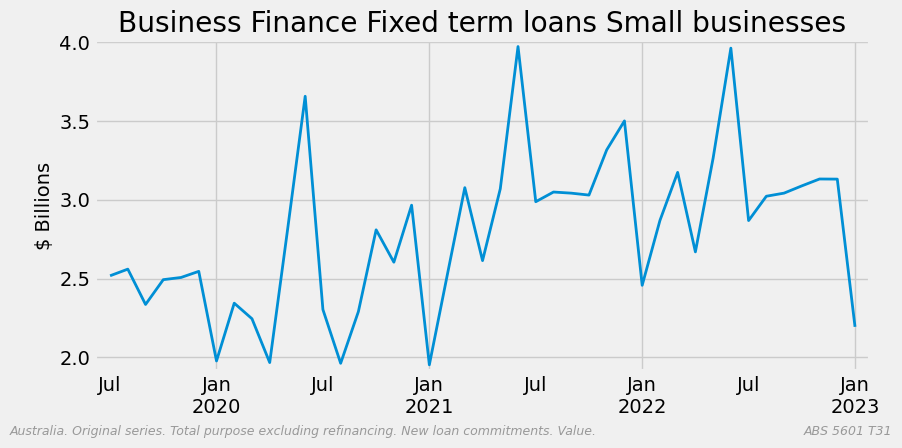

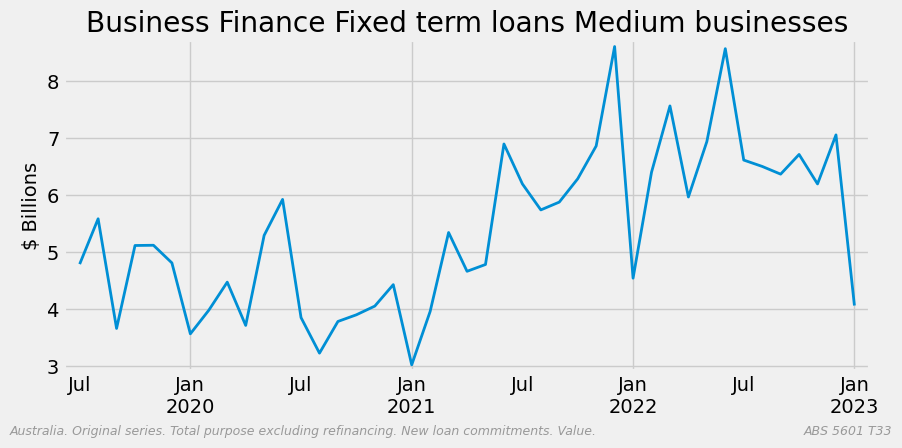

In [9]:
rows = meta[
    meta[did_col].str.contains('Business')
    & meta[did_col].str.contains('loans')
    & meta[did_col].str.contains('Total purpose')
]
for index, row in rows.iterrows():
    series_id, units, table, did, series_type = row[id_col], row[unit_col], row[table_col], row[did_col], row[type_col]
    series, units = recalibrate_series(abs_dict[table][series_id], units)
    ax = series.plot(lw=2)
    title, lfooter = fix_title(did, f'Australia. {series_type} series. ')
    title = title.replace('Businesses', '').strip()
    finalise_plot(
        ax,
        title=title,
        ylabel=f'{units}',
        lfooter=lfooter,
        rfooter=f'{source} T{table}',
        show=True,
    )

## Finished

In [ ]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

In [ ]:
print("Done")